# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.



In [1]:
# EDA provide more information about the data

## Import Libraries
Let's import some libraries to get started!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading data

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Based on the above information we have to predict that whether the person is survived or not

In [7]:
# Let's find how many nan values are present in the dataset

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
## we can Visualize missing value through graph also

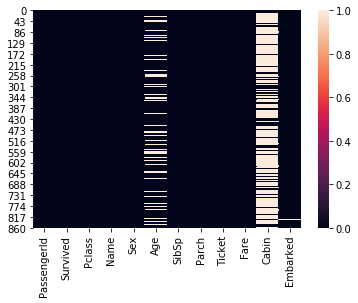

In [12]:
sns.heatmap(df.isnull())

In [13]:
# all the none values are in white color

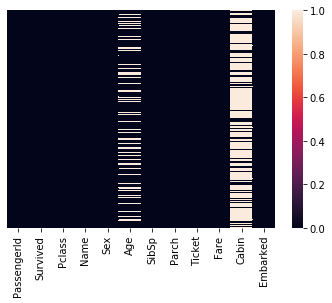

In [14]:
sns.heatmap(df.isnull(),yticklabels=False) # yticklabels=false from y axis

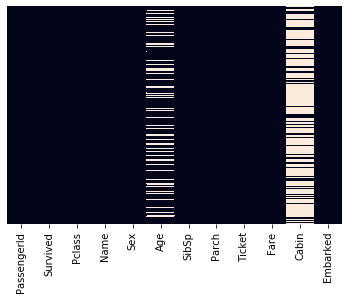

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

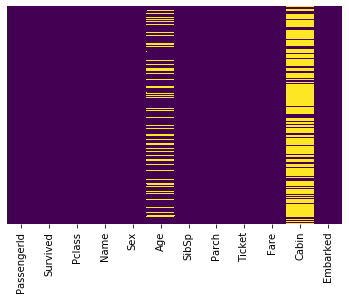

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# So basically it provide which column has more nan values

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"



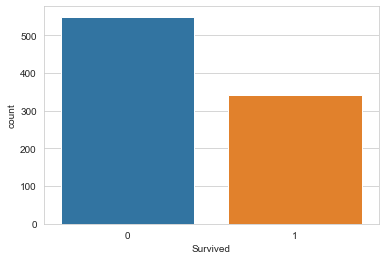

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

In [19]:
## It will draw the count plot to show how many passenger survived or not

In [20]:
## Can we plot based on sex ex how many male survived and how many female survivide

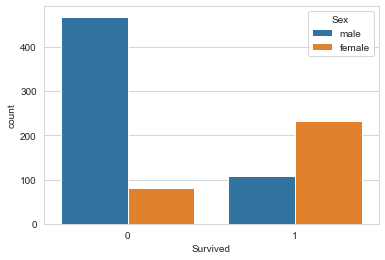

In [21]:
sns.countplot(x='Survived', hue='Sex',data=df)

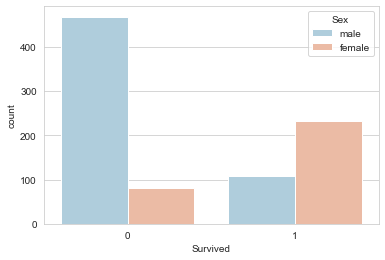

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

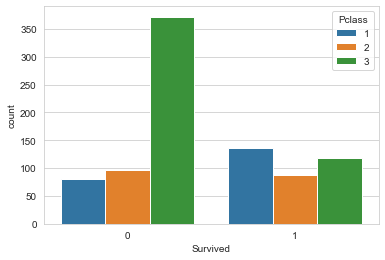

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

In [24]:
# Here we can see that passenger class 1 has less death count, and more survival count
# passenger class 2 has more death coount than class1 and less than class 3, and survival rate is less than other 2 class
# passenger class 3 has highest death count

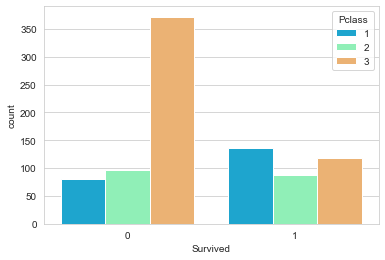

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

In [26]:
## Now let's find the distribution of the age 

ValueError: cannot convert float NaN to integer

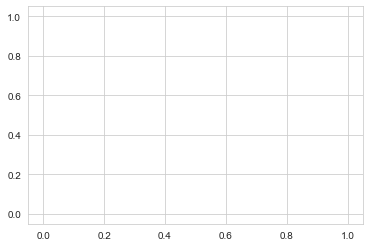

In [28]:
sns.distplot(df['Age'])

In [29]:
# So here Age contain null value so we have to drop that 

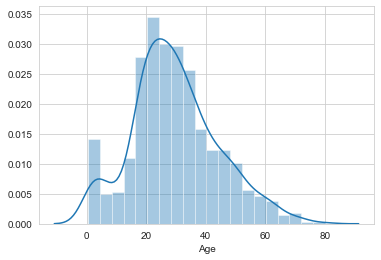

In [30]:
sns.distplot(df['Age'].dropna())

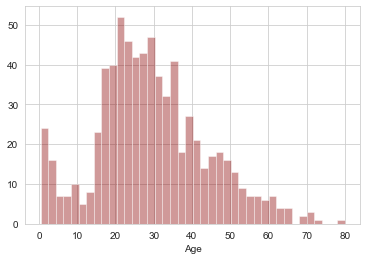

In [31]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40) #kde=kernal density estimation

In [32]:
# The above graph basically provide the information about count of people in given range

In [33]:
# for the same graph we can use histogram also

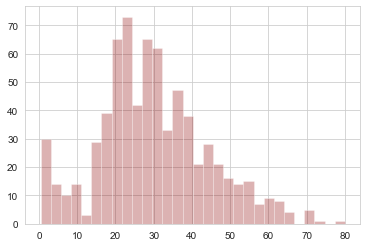

In [34]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

In [35]:
# let's draw contplot of sibsp

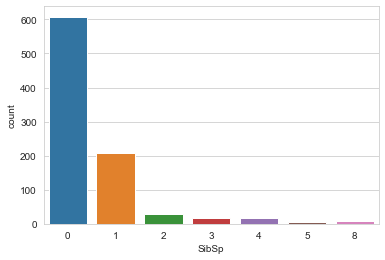

In [36]:
sns.countplot(x='SibSp',data=df)

In [37]:
# it will give number of people who have 0 sibsp, 1sibsp, 2sibsp

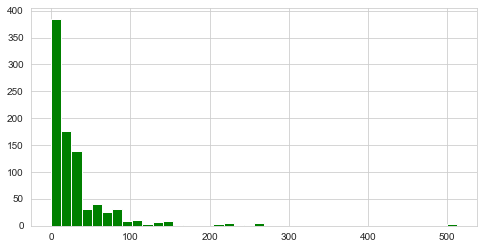

In [38]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [39]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [40]:
import cufflinks as cf
cf.go_offline()

In [41]:
df['Fare'].iplot(kind='hist',bins=30,color='green')

In [42]:
## We have null values in age and  cabin columns

In [43]:
## Instaed of droping the age column we can fill the age column with some value

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

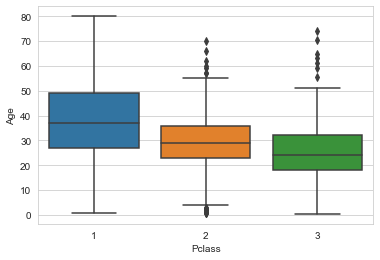

In [44]:
sns.boxplot(x='Pclass', y='Age', data=df)

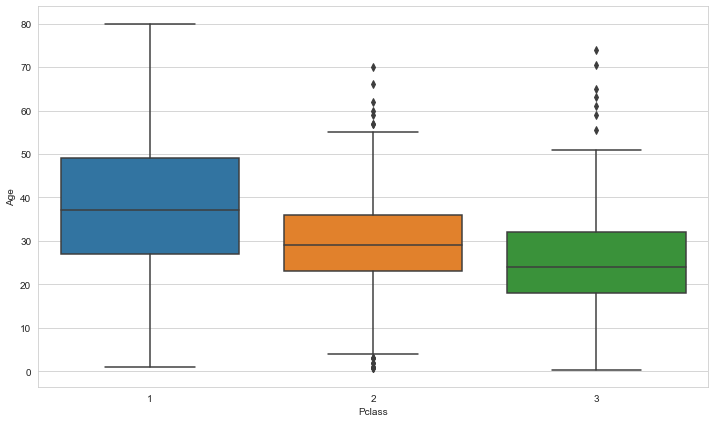

In [45]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df)

In [46]:
# here we can see that pepole who belongs to class 1 has average age of 39
#  pepole who belongs to class 2 has average age of 29
#  pepole who belongs to class 3 has average age of 23 or 24

In [47]:
# Boxplot basically provide the 25th percentile value, 50th percentile value and 75th percentile value

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [48]:
def impute(cols):
    Age = cols[0]  # First column will be age 
    Pclass = cols[1] # second column will be Pclass
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            
            return 38
        
        elif Pclass == 2:
            
            return 29
        
        else:
            return 24
    
    else:
        return Age
    

In [49]:
# Now Apply function in dataframe

In [50]:
df['Age'] = df[['Age','Pclass']].apply(impute, axis=1)

In [51]:
# Now let's check heat map again

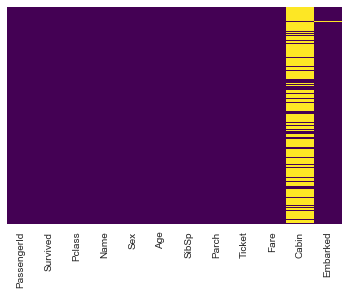

In [52]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
# Cabin contain lot's of Null value so we will drop that column instead of imputing 

In [57]:
df.drop('Cabin', axis=1, inplace=True)

In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [59]:
# If there are still any na values then we can drop that using

In [60]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [61]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [62]:
# In our dataframe there are many column which are not required ex. PassengerId, Name, Ticket so we can drop them

In [63]:
df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [64]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [65]:
df1 = df.copy()

In [66]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [67]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [68]:
df1.dropna(inplace=True)

In [69]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [70]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [71]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [72]:
# In our dataframe there are still two catagorical feature so we have to handel them "Sex" and 'Embarked'

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [74]:
# To convert catagorical data into numeric we convert them into dummy variable by using pandas_get-dummy method

In [75]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [76]:
# to avoid dummy trap variable we remove one dummy column

In [77]:
dummy = pd.get_dummies(df['Embarked'], drop_first=True)

In [78]:
dummy.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [79]:
dummy1 = pd.get_dummies(df['Sex'], drop_first=True)

In [80]:
dummy1

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [81]:
df1 = pd.concat([dummy,dummy1,df1], axis=1)

In [82]:
df1

,Q,S,male,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,0,0,0,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,0,1,0,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,0,1,0,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,0,1,1,0.0,3.0,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,0.0,2.0,male,27.0,0.0,0.0,13.0000,S
887,0,1,0,1.0,1.0,female,19.0,0.0,0.0,30.0000,S
888,0,1,0,0.0,3.0,female,24.0,1.0,2.0,23.4500,S
889,0,0,1,1.0,1.0,male,26.0,0.0,0.0,30.0000,C


In [83]:
df1.drop(['Sex','Embarked'],axis=1, inplace=True)

# 

In [84]:
df1

,Q,S,male,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,1,0.0,3.0,22.0,1.0,0.0,7.2500
1,0,0,0,1.0,1.0,38.0,1.0,0.0,71.2833
2,0,1,0,1.0,3.0,26.0,0.0,0.0,7.9250
3,0,1,0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0,1,1,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,1,1,0.0,2.0,27.0,0.0,0.0,13.0000
887,0,1,0,1.0,1.0,19.0,0.0,0.0,30.0000
888,0,1,0,0.0,3.0,24.0,1.0,2.0,23.4500
889,0,0,1,1.0,1.0,26.0,0.0,0.0,30.0000


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [100]:
df1.isnull().sum()

Q           0
S           0
male        0
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [102]:
df1.dropna(inplace=True)

In [103]:
df1.isnull().sum()

Q           0
S           0
male        0
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [105]:
x = df1.drop('Survived', axis=1)

In [106]:
y = df1['Survived']

In [107]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Training and Predicting

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
model = LogisticRegression()

In [116]:
model.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
model.predict(X_test)

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0.

In [119]:
prediction = model.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
accuracy = confusion_matrix(y_test, prediction)

In [122]:
accuracy

array([[159,  25],
       [ 32,  78]], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
    accuracy_score = accuracy_score(y_test, prediction)

In [125]:
accuracy_score

0.8061224489795918

In [127]:
prediction

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0.